In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("./dataset/recipes_entrenamiento.csv")

In [3]:
X = data.iloc[:,6:15]

def dividir_entre_personas(row):
    return row / data["RecipeServings"][row.name]

X = X.apply(dividir_entre_personas, axis=1)

In [4]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

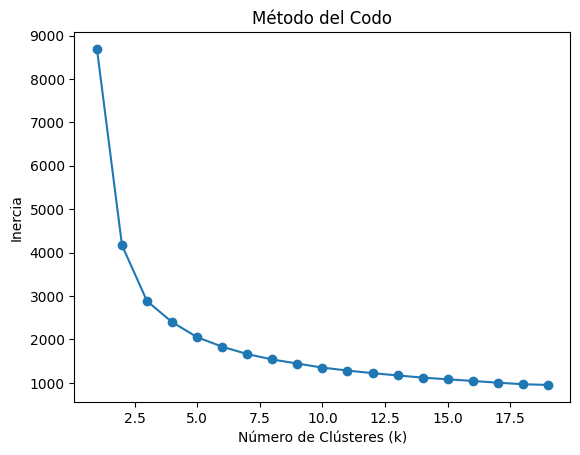

In [5]:
# Lista para almacenar las inercias
inercias = []

# Probar diferentes valores de k
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercias.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 20), inercias, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [6]:
model = KMeans(n_clusters=8, random_state=44)

data["cluster"] = model.fit_predict(X_scaled)

In [7]:
reductor = NMF(n_components=2, random_state=44)
x_reduced = reductor.fit_transform(X_scaled)

In [8]:
data["cluster"].unique()

array([0, 6, 3, 4, 5, 2, 1, 7])

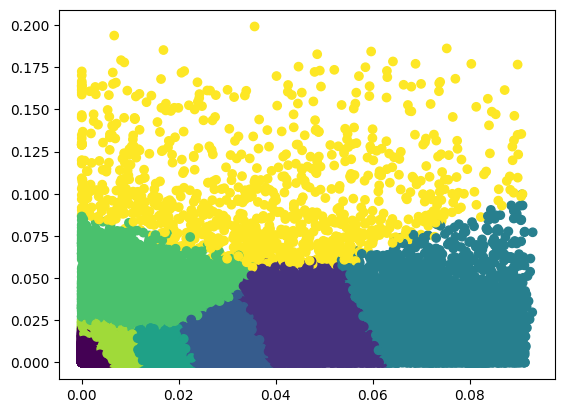

In [9]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=data["cluster"], cmap="viridis")
plt.show()

In [10]:
data["cluster"].value_counts()

cluster
0    152469
6     78704
4     44572
2     21616
1      9887
5      7495
3      4222
7      1007
Name: count, dtype: int64

In [11]:
model.inertia_

1537.6225143016172

In [ ]:
# Calcular el Silhouette Score
score = silhouette_score(X_scaled, data["cluster"])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.4011364110354706


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data["cluster"], test_size=0.2, random_state=44)

In [14]:
model_pred = LogisticRegression()
model_pred.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = model_pred.predict(X_test)

In [16]:
print(f"acuraccy: {accuracy_score(y_test, y_pred)}")
print(f"recall: {precision_score(y_test, y_pred, average=None)}")
print(f"presition: {recall_score(y_test, y_pred, average=None)}")

acuraccy: 0.9690757090397687
recall: [0.98258931 0.93472298 0.93799002 0.98495212 0.95131254 0.96373457
 0.96675708 0.8056872 ]
presition: [1.         0.86850153 0.90633609 0.86227545 0.95463244 0.85665295
 0.96578234 0.79812207]


In [59]:
data[ (data["cluster"] == 0) & (data["RecipeServings"] == 1)].iloc[:,6:15].head(5)

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
238,64.6,0.1,0.0,0.0,19.1,15.9,0.0,15.7,0.3
242,3.6,0.3,0.2,0.0,29.0,0.0,0.0,0.0,0.2
353,28.3,0.2,0.0,0.0,16.0,6.3,1.4,4.9,1.5
1992,104.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
2007,6.2,0.1,0.0,0.0,0.3,2.0,0.1,0.7,0.1


In [60]:
data[ (data["cluster"] == 1) & (data["RecipeServings"] == 1)].iloc[:,6:15].head(5)

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
220,363.5,26.6,2.9,0.0,584.4,29.6,7.1,15.7,9.9
543,295.4,16.7,6.7,29.3,536.0,22.3,6.1,1.8,18.9
795,269.3,6.5,4.0,21.0,571.2,35.8,0.9,27.8,17.8
827,494.3,42.4,13.4,38.6,499.5,14.1,3.3,4.3,17.9
835,176.5,11.9,7.4,30.5,614.5,17.3,3.6,10.2,3.5


In [63]:
data[ (data["cluster"] == 2) & (data["RecipeServings"] == 1)].iloc[:,6:15].head(5)

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
854,306.5,16.0,2.2,0.0,312.1,34.8,2.0,2.5,6.2
979,203.5,9.0,5.6,34.2,348.8,23.6,0.1,11.8,8.3
1034,337.5,16.4,2.5,0.0,364.1,39.6,4.6,4.7,12.2
1323,349.9,7.4,2.0,5.2,282.9,55.7,4.1,38.4,18.6
1576,328.4,3.9,0.7,31.8,342.1,51.4,5.2,9.2,23.3


In [65]:
data[ (data["cluster"] == 3) & (data["RecipeServings"] == 1)].iloc[:,6:15].head(5)

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
616,528.5,6.2,1.7,211.5,653.9,95.8,3.4,0.7,19.2
718,276.4,11.0,3.8,100.7,775.3,21.3,0.5,0.8,16.4
1186,630.8,6.0,1.3,196.8,723.7,45.9,3.4,4.3,93.5
1279,971.7,0.6,0.0,0.0,850.5,248.1,0.0,119.7,7.2
1624,210.2,3.3,0.5,0.0,681.9,40.2,6.4,2.4,9.0


In [67]:
data[ (data["cluster"] == 4) & (data["RecipeServings"] == 1)].iloc[:,6:15].head(5)

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
72,84.0,2.0,0.5,0.3,145.9,14.1,0.8,0.7,2.4
227,91.0,1.1,0.7,4.3,164.6,19.6,0.0,18.2,1.0
1925,15.1,0.4,0.1,0.0,158.2,3.1,1.1,0.2,0.6
2313,95.8,6.9,4.2,17.3,154.5,5.9,0.9,0.8,2.8
2323,111.4,1.1,0.7,0.0,148.2,23.4,1.0,18.4,1.9


In [69]:
data[ (data["cluster"] == 5) & (data["RecipeServings"] == 1)].iloc[:,6:15].head(5)

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
175,387.0,0.0,0.0,0.0,136.2,100.0,0.0,99.8,0.0
345,410.1,24.8,3.8,0.0,215.9,64.5,31.5,2.3,14.2
367,874.8,0.2,0.0,0.0,127.5,218.5,0.0,206.2,7.2
483,881.5,57.7,8.2,75.5,151.6,60.1,3.9,4.9,30.5
498,650.5,10.8,3.3,372.0,149.4,100.7,3.5,0.7,26.1


In [71]:
data[ (data["cluster"] == 6) & (data["RecipeServings"] == 1)].iloc[:,6:15].head(5)

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
55,110.5,7.3,1.0,0.0,53.2,9.8,3.1,2.9,3.2
73,66.5,0.8,0.2,0.0,127.8,12.7,0.6,1.1,1.9
432,241.0,0.5,0.2,0.0,37.0,41.1,0.0,0.0,12.2
864,201.1,0.5,0.0,0.0,79.9,4.8,1.4,0.2,3.0
1319,263.1,0.5,0.1,0.0,7.8,64.9,4.8,4.2,3.8


In [73]:
data[ (data["cluster"] == 7) & (data["RecipeServings"] == 1)].iloc[:,6:15].head(5)

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
128,1362.3,57.8,36.5,152.7,992.7,214.4,0.6,0.1,7.8
172,1548.0,0.0,0.0,0.0,11.1,399.9,0.0,399.2,0.0
290,1095.5,88.8,18.9,6.4,817.1,48.5,12.0,20.8,46.0
458,931.8,25.8,5.1,0.0,287.9,176.2,17.1,123.1,14.0
475,1548.0,0.0,0.0,0.0,11.1,399.9,0.0,399.2,0.0


In [21]:
data = data[ ["RecipeId", "cluster"] ]
data.to_csv('./dataset/recipes_entrenamiento_clusterizada.csv', index=False)

In [20]:
from joblib import dump
dump(model_pred, './models/model.joblib')

['./models/model.joblib']